# Tree Diagrams

## Tree Layout

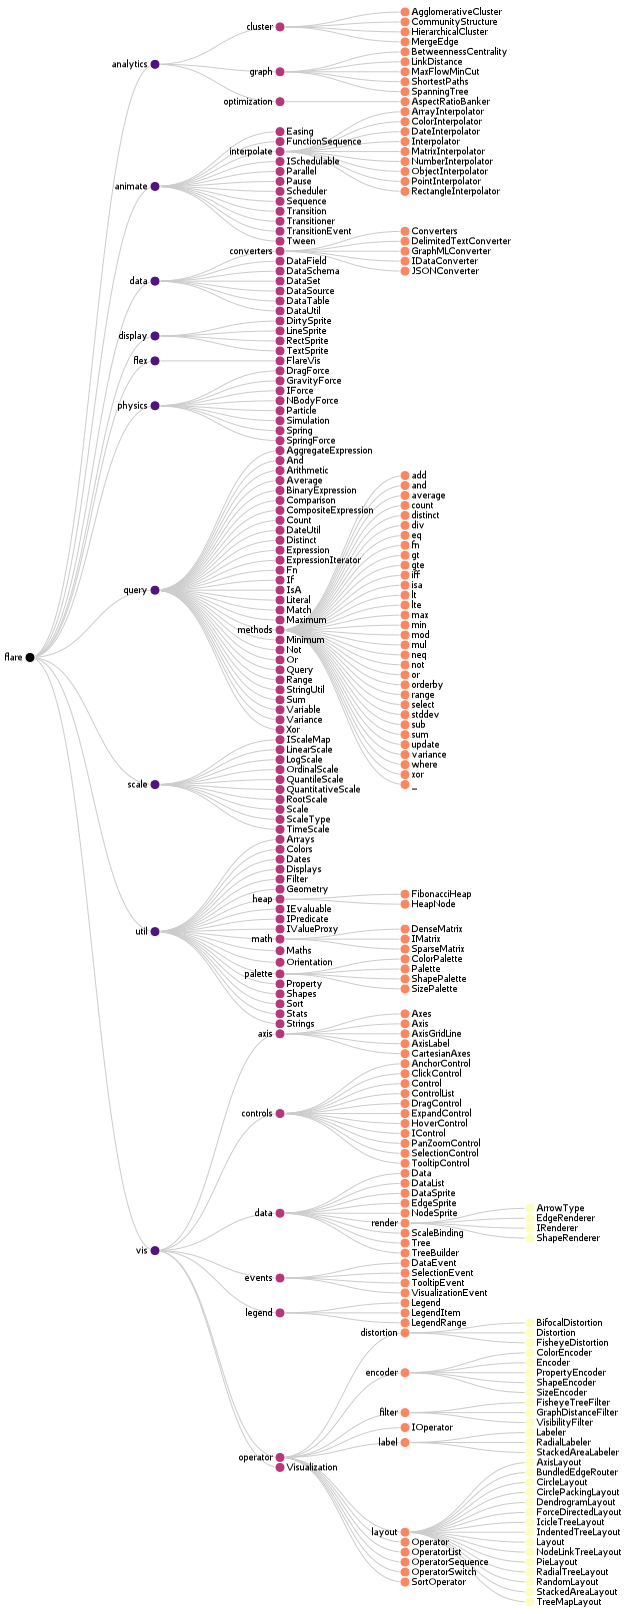

In [2]:
using VegaLite, VegaDatasets

@vgplot(
    height=1600,
    padding=5,
    marks=[
        {
            encode={
                update={
                    stroke={
                        value="#ccc"
                    },
                    path={
                        field="path"
                    }
                }
            },
            from={
                data="links"
            },
            type="path"
        },
        {
            encode={
                update={
                    x={
                        field="x"
                    },
                    fill={
                        field="depth",
                        scale="color"
                    },
                    y={
                        field="y"
                    }
                },
                enter={
                    stroke={
                        value="#fff"
                    },
                    size={
                        value=100
                    }
                }
            },
            from={
                data="tree"
            },
            type="symbol"
        },
        {
            encode={
                update={
                    align={
                        signal="datum.children ? 'right' : 'left'"
                    },
                    x={
                        field="x"
                    },
                    dx={
                        signal="datum.children ? -7 : 7"
                    },
                    opacity={
                        signal="labels ? 1 : 0"
                    },
                    y={
                        field="y"
                    }
                },
                enter={
                    fontSize={
                        value=9
                    },
                    text={
                        field="name"
                    },
                    baseline={
                        value="middle"
                    }
                }
            },
            from={
                data="tree"
            },
            type="text"
        }
    ],
    data=[
        {
            name="tree",
            values=dataset("flare"),
            transform=[
                {
                    key="id",
                    parentKey="parent",
                    type="stratify"
                },
                {
                    method={
                        signal="layout"
                    },
                    separation={
                        signal="separation"
                    },
                    as=[
                        "y",
                        "x",
                        "depth",
                        "children"
                    ],
                    size=[
                        {
                            signal="height"
                        },
                        {
                            signal="width - 100"
                        }
                    ],
                    type="tree"
                }
            ]
        },
        {
            name="links",
            source="tree",
            transform=[
                {
                    type="treelinks"
                },
                {
                    shape={
                        signal="links"
                    },
                    type="linkpath",
                    orient="horizontal"
                }
            ]
        }
    ],
    scales=[
        {
            name="color",
            zero=true,
            range={
                scheme="magma"
            },
            domain={
                data="tree",
                field="depth"
            },
            type="linear"
        }
    ],
    width=600,
    signals=[
        {
            name="labels",
            bind={
                input="checkbox"
            },
            value=true
        },
        {
            name="layout",
            bind={
                options=[
                    "tidy",
                    "cluster"
                ],
                input="radio"
            },
            value="tidy"
        },
        {
            name="links",
            bind={
                options=[
                    "line",
                    "curve",
                    "diagonal",
                    "orthogonal"
                ],
                input="select"
            },
            value="diagonal"
        },
        {
            name="separation",
            bind={
                input="checkbox"
            },
            value=false
        }
    ]
)

## Radial Tree Layout

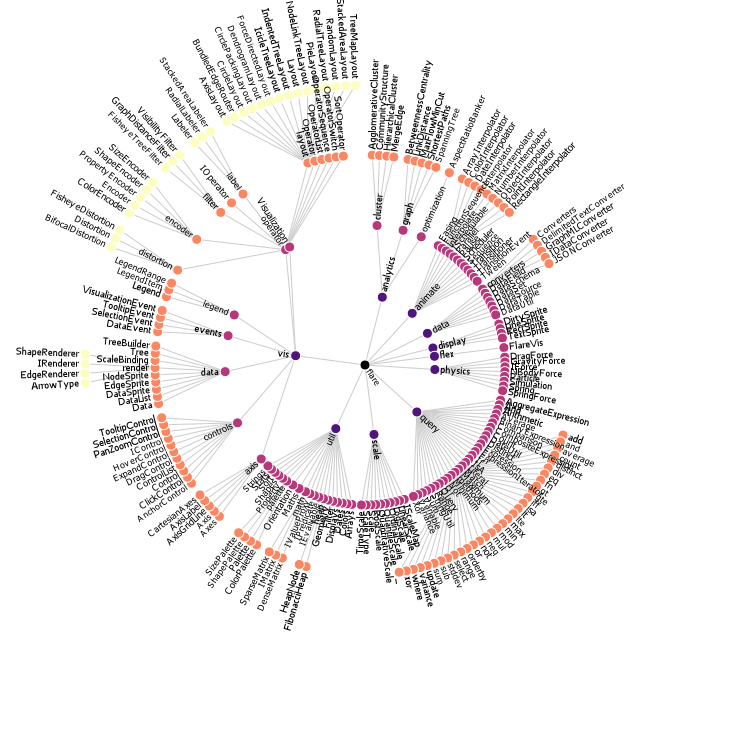

In [3]:
using VegaLite, VegaDatasets

@vgplot(
    height=720,
    padding=5,
    marks=[
        {
            encode={
                update={
                    stroke={
                        value="#ccc"
                    },
                    x={
                        signal="originX"
                    },
                    path={
                        field="path"
                    },
                    y={
                        signal="originY"
                    }
                }
            },
            from={
                data="links"
            },
            type="path"
        },
        {
            encode={
                update={
                    x={
                        field="x"
                    },
                    fill={
                        field="depth",
                        scale="color"
                    },
                    y={
                        field="y"
                    }
                },
                enter={
                    stroke={
                        value="#fff"
                    },
                    size={
                        value=100
                    }
                }
            },
            from={
                data="tree"
            },
            type="symbol"
        },
        {
            encode={
                update={
                    align={
                        signal="datum.leftside ? 'right' : 'left'"
                    },
                    x={
                        field="x"
                    },
                    dx={
                        signal="(datum.leftside ? -1 : 1) * 6"
                    },
                    angle={
                        signal="datum.leftside ? datum.angle - 180 : datum.angle"
                    },
                    opacity={
                        signal="labels ? 1 : 0"
                    },
                    y={
                        field="y"
                    }
                },
                enter={
                    fontSize={
                        value=9
                    },
                    text={
                        field="name"
                    },
                    baseline={
                        value="middle"
                    }
                }
            },
            from={
                data="tree"
            },
            type="text"
        }
    ],
    data=[
        {
            name="tree",
            values=dataset("flare"),
            transform=[
                {
                    key="id",
                    parentKey="parent",
                    type="stratify"
                },
                {
                    method={
                        signal="layout"
                    },
                    as=[
                        "alpha",
                        "radius",
                        "depth",
                        "children"
                    ],
                    size=[
                        1,
                        {
                            signal="radius"
                        }
                    ],
                    type="tree"
                },
                {
                    as="angle",
                    expr="(rotate + extent * datum.alpha + 270) % 360",
                    type="formula"
                },
                {
                    as="radians",
                    expr="PI * datum.angle / 180",
                    type="formula"
                },
                {
                    as="leftside",
                    expr="inrange(datum.angle, [90, 270])",
                    type="formula"
                },
                {
                    as="x",
                    expr="originX + datum.radius * cos(datum.radians)",
                    type="formula"
                },
                {
                    as="y",
                    expr="originY + datum.radius * sin(datum.radians)",
                    type="formula"
                }
            ]
        },
        {
            name="links",
            source="tree",
            transform=[
                {
                    type="treelinks"
                },
                {
                    targetX="target.radians",
                    shape={
                        signal="links"
                    },
                    sourceX="source.radians",
                    targetY="target.radius",
                    type="linkpath",
                    orient="radial",
                    sourceY="source.radius"
                }
            ]
        }
    ],
    scales=[
        {
            name="color",
            zero=true,
            range={
                scheme="magma"
            },
            domain={
                data="tree",
                field="depth"
            },
            type="linear"
        }
    ],
    width=720,
    autosize="none",
    signals=[
        {
            name="labels",
            bind={
                input="checkbox"
            },
            value=true
        },
        {
            name="radius",
            bind={
                max=600,
                min=20,
                input="range"
            },
            value=280
        },
        {
            name="extent",
            bind={
                step=1,
                max=360,
                min=0,
                input="range"
            },
            value=360
        },
        {
            name="rotate",
            bind={
                step=1,
                max=360,
                min=0,
                input="range"
            },
            value=0
        },
        {
            name="layout",
            bind={
                options=[
                    "tidy",
                    "cluster"
                ],
                input="radio"
            },
            value="tidy"
        },
        {
            name="links",
            bind={
                options=[
                    "line",
                    "curve",
                    "diagonal",
                    "orthogonal"
                ],
                input="select"
            },
            value="line"
        },
        {
            name="originX",
            update="width / 2"
        },
        {
            name="originY",
            update="height / 2"
        }
    ]
)

## Treemap

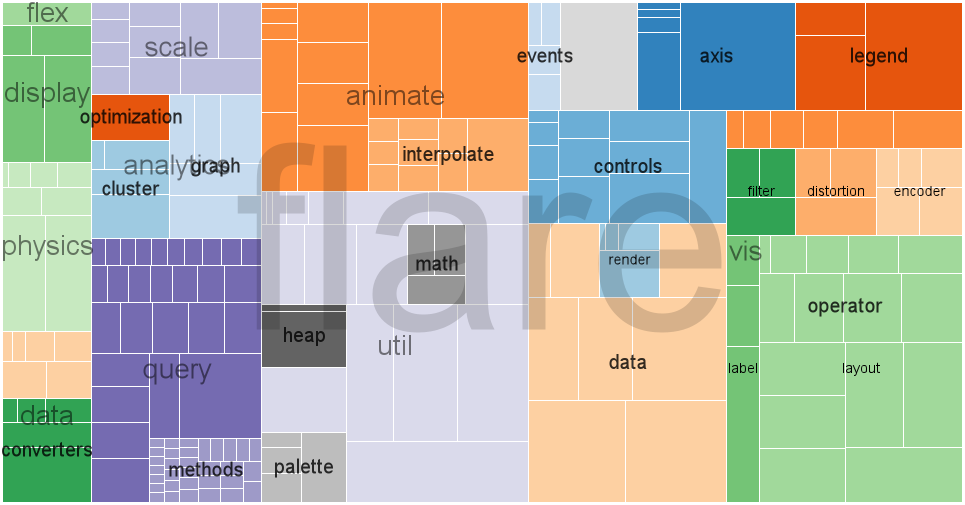

In [4]:
using VegaLite, VegaDatasets

@vgplot(
    height=500,
    padding=2.5,
    marks=[
        {
            encode={
                update={
                    x2={
                        field="x1"
                    },
                    x={
                        field="x0"
                    },
                    y2={
                        field="y1"
                    },
                    y={
                        field="y0"
                    }
                },
                enter={
                    fill={
                        field="name",
                        scale="color"
                    }
                }
            },
            interactive=false,
            from={
                data="nodes"
            },
            type="rect"
        },
        {
            encode={
                update={
                    x2={
                        field="x1"
                    },
                    x={
                        field="x0"
                    },
                    y2={
                        field="y1"
                    },
                    fill={
                        value="transparent"
                    },
                    y={
                        field="y0"
                    }
                },
                hover={
                    fill={
                        value="red"
                    }
                },
                enter={
                    stroke={
                        value="#fff"
                    }
                }
            },
            from={
                data="leaves"
            },
            type="rect"
        },
        {
            encode={
                update={
                    x={
                        signal="0.5 * (datum.x0 + datum.x1)"
                    },
                    y={
                        signal="0.5 * (datum.y0 + datum.y1)"
                    }
                },
                enter={
                    fillOpacity={
                        field="depth",
                        scale="opacity"
                    },
                    font={
                        value="Helvetica Neue, Arial"
                    },
                    fontSize={
                        field="depth",
                        scale="size"
                    },
                    fill={
                        value="#000"
                    },
                    baseline={
                        value="middle"
                    },
                    text={
                        field="name"
                    },
                    align={
                        value="center"
                    }
                }
            },
            interactive=false,
            from={
                data="nodes"
            },
            type="text"
        }
    ],
    data=[
        {
            name="tree",
            values=dataset("flare"),
            transform=[
                {
                    key="id",
                    parentKey="parent",
                    type="stratify"
                },
                {
                    method={
                        signal="layout"
                    },
                    sort={
                        field="value"
                    },
                    ratio={
                        signal="aspectRatio"
                    },
                    field="size",
                    size=[
                        {
                            signal="width"
                        },
                        {
                            signal="height"
                        }
                    ],
                    type="treemap",
                    round=true
                }
            ]
        },
        {
            name="nodes",
            source="tree",
            transform=[
                {
                    expr="datum.children",
                    type="filter"
                }
            ]
        },
        {
            name="leaves",
            source="tree",
            transform=[
                {
                    expr="!datum.children",
                    type="filter"
                }
            ]
        }
    ],
    scales=[
        {
            name="color",
            range=[
                "#3182bd",
                "#6baed6",
                "#9ecae1",
                "#c6dbef",
                "#e6550d",
                "#fd8d3c",
                "#fdae6b",
                "#fdd0a2",
                "#31a354",
                "#74c476",
                "#a1d99b",
                "#c7e9c0",
                "#756bb1",
                "#9e9ac8",
                "#bcbddc",
                "#dadaeb",
                "#636363",
                "#969696",
                "#bdbdbd",
                "#d9d9d9"
            ],
            domain={
                data="nodes",
                field="name"
            },
            type="ordinal"
        },
        {
            name="size",
            range=[
                256,
                28,
                20,
                14
            ],
            domain=[
                0,
                1,
                2,
                3
            ],
            type="ordinal"
        },
        {
            name="opacity",
            range=[
                0.15,
                0.5,
                0.8,
                1.0
            ],
            domain=[
                0,
                1,
                2,
                3
            ],
            type="ordinal"
        }
    ],
    width=960,
    autosize="none",
    signals=[
        {
            name="layout",
            bind={
                options=[
                    "squarify",
                    "binary",
                    "slicedice"
                ],
                input="select"
            },
            value="squarify"
        },
        {
            name="aspectRatio",
            bind={
                step=0.1,
                max=5,
                min=1,
                input="range"
            },
            value=1.6
        }
    ]
)

## Circle Packing

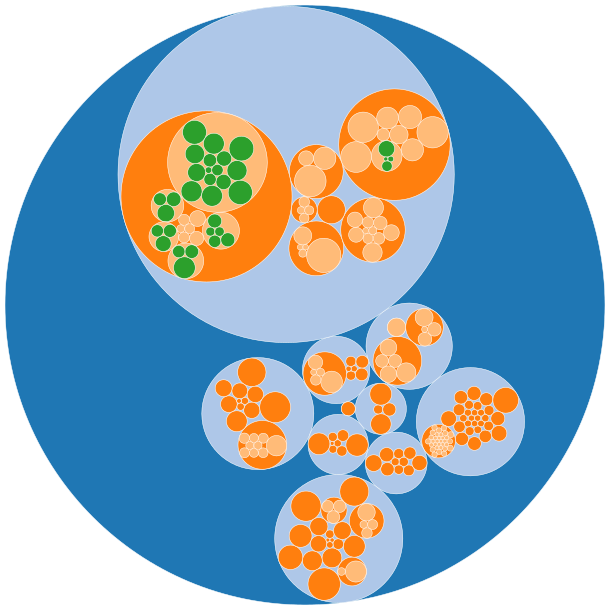

In [5]:
using VegaLite, VegaDatasets

@vgplot(
    height=600,
    padding=5,
    marks=[
        {
            encode={
                update={
                    stroke={
                        value="white"
                    },
                    x={
                        field="x"
                    },
                    strokeWidth={
                        value=0.5
                    },
                    size={
                        signal="4 * datum.r * datum.r"
                    },
                    y={
                        field="y"
                    }
                },
                hover={
                    stroke={
                        value="red"
                    },
                    strokeWidth={
                        value=2
                    }
                },
                enter={
                    shape={
                        value="circle"
                    },
                    tooltip={
                        signal="datum.name + (datum.size ? ', ' + datum.size + ' bytes' : '')"
                    },
                    fill={
                        field="depth",
                        scale="color"
                    }
                }
            },
            from={
                data="tree"
            },
            type="symbol"
        }
    ],
    data=[
        {
            name="tree",
            values=dataset("flare"),
            transform=[
                {
                    key="id",
                    parentKey="parent",
                    type="stratify"
                },
                {
                    sort={
                        field="value"
                    },
                    field="size",
                    size=[
                        {
                            signal="width"
                        },
                        {
                            signal="height"
                        }
                    ],
                    type="pack"
                }
            ]
        }
    ],
    scales=[
        {
            name="color",
            range={
                scheme="category20"
            },
            domain={
                data="tree",
                field="depth"
            },
            type="ordinal"
        }
    ],
    width=600,
    autosize="none"
)

## Sunburst

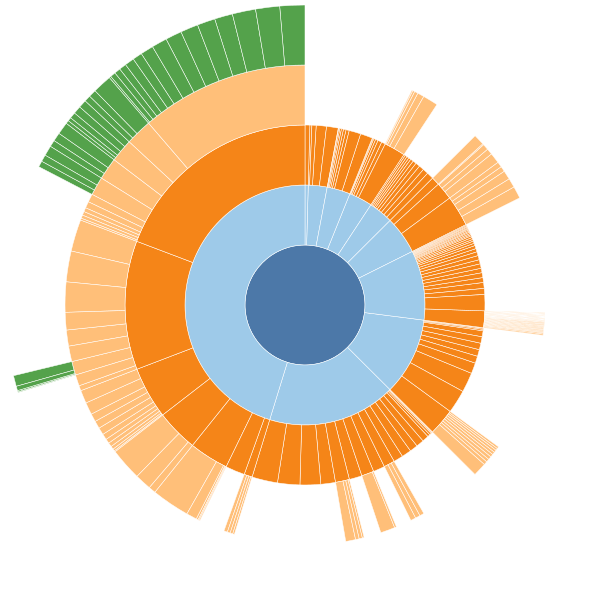

In [6]:
using VegaLite, VegaDatasets

@vgplot(
    height=600,
    padding=5,
    marks=[
        {
            encode={
                update={
                    innerRadius={
                        field="r0"
                    },
                    startAngle={
                        field="a0"
                    },
                    stroke={
                        value="white"
                    },
                    endAngle={
                        field="a1"
                    },
                    outerRadius={
                        field="r1"
                    },
                    strokeWidth={
                        value=0.5
                    },
                    zindex={
                        value=0
                    }
                },
                hover={
                    stroke={
                        value="red"
                    },
                    strokeWidth={
                        value=2
                    },
                    zindex={
                        value=1
                    }
                },
                enter={
                    tooltip={
                        signal="datum.name + (datum.size ? ', ' + datum.size + ' bytes' : '')"
                    },
                    x={
                        signal="width / 2"
                    },
                    fill={
                        field="depth",
                        scale="color"
                    },
                    y={
                        signal="height / 2"
                    }
                }
            },
            from={
                data="tree"
            },
            type="arc"
        }
    ],
    data=[
        {
            name="tree",
            values=dataset("flare"),
            transform=[
                {
                    key="id",
                    parentKey="parent",
                    type="stratify"
                },
                {
                    sort={
                        field="value"
                    },
                    field="size",
                    as=[
                        "a0",
                        "r0",
                        "a1",
                        "r1",
                        "depth",
                        "children"
                    ],
                    size=[
                        {
                            signal="2 * PI"
                        },
                        {
                            signal="width / 2"
                        }
                    ],
                    type="partition"
                }
            ]
        }
    ],
    scales=[
        {
            name="color",
            range={
                scheme="tableau20"
            },
            domain={
                data="tree",
                field="depth"
            },
            type="ordinal"
        }
    ],
    width=600,
    autosize="none"
)